<a href="https://colab.research.google.com/github/abm4github/Airbnb-EDA/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

**Data Source**

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values

In [69]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [71]:
# loading and inspecting data

df=pd.read_csv('Airbnb NYC 2019.csv')

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [72]:
# retrieving all column names

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### **Understanding, Wrangling and Cleaning Data**

In [73]:
# inspecting dataset for null values

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [74]:
# cleaning data by removing unnecessary columns/fields
# note:'host_name' is to be deleted for ethical reasons

df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)


In [75]:
df.sample(4)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
8782,25368839,Staten Island,Dongan Hills,40.58115,-74.09182,Entire home/apt,155,3,63,1.29,1,0
29157,163715101,Manhattan,Hell's Kitchen,40.76402,-73.98909,Entire home/apt,110,2,67,3.93,1,67
12505,766920,Brooklyn,Carroll Gardens,40.68316,-73.99775,Entire home/apt,100,2,4,0.09,1,0
31184,97015202,Manhattan,SoHo,40.72741,-74.00880,Private room,150,1,61,4.11,1,8


In [76]:
# replacing null values of 'reviews_per_month' with zeros

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [77]:
# confirming that there are non null values in our dataset

df.isna().sum().sum()

0

making sure that there are no missing values, let's inspect some interesting categorical unique values 

In [78]:
# checking for unique iterations in 'neighbourhood_group' field/ column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [79]:
# checking for sum of unique iterations in 'neighbourhood' field/ column 
len(df.neighbourhood.unique())

221

In [80]:
# checking for unique iterations in 'room_type' field/ column 
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**Exploring and Visualizing Data**

we are now ready to explore the data statistically and to visualize the values of features and correlations between different features.

Here, we can make a rule that we start to work from left to right, so that no column is missed out from exploration

In [81]:
# let us see what 'host_id's (hosts), holds most listings on Airbnb
# top 10

top_hosts = df.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [82]:
# using alternate way  to confirm the above finding
# top host 

top_host = df.calculated_host_listings_count.max()
top_host

327

In [83]:
# setting figure size for visusalization

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [84]:
# creating dataframe of 'host_id's and their listings
df_top_hosts = pd.DataFrame(top_hosts)
df_top_hosts.reset_index(inplace = True)
df_top_hosts.rename(columns={'index':'Host_ID','host_id':'N_Listings'},
                    inplace=True)
df_top_hosts

,Host_ID,N_Listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

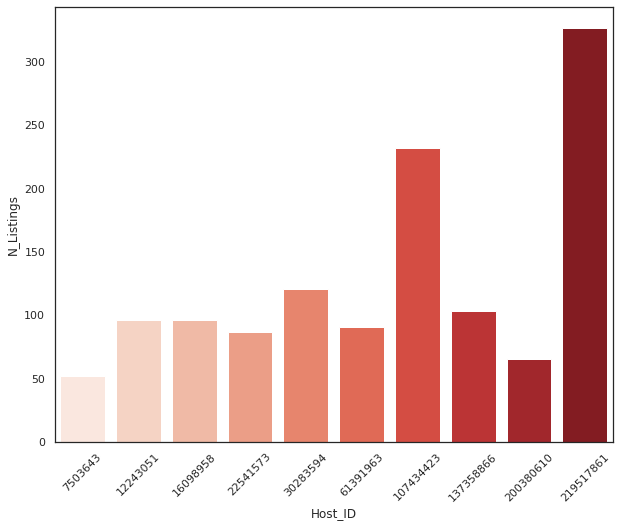

In [85]:
viz_HostId_Listings = sns.barplot(x='Host_ID', y='N_Listings', 
                                  data =df_top_hosts, palette='Reds')
viz_HostId_Listings.set_xticklabels(viz_HostId_Listings.get_xticklabels(),
                                    rotation = 45)

Here we can observe the distribution of number of listings by top ten hosts on Airbnb, the maximum number of listing by any is above 300.
